In [56]:
import numpy as np
from skimage import data
from skimage . color import rgb2gray
import matplotlib . pyplot as plt
from mpl_toolkits . mplot3d import Axes3D
import cv2 as cv # librairie OpenCV
from tqdm import tqdm
from PIL import Image

In [57]:
def block_matching(Iref, Isearch, N, maxdisp):
    disp = np.zeros_like(Iref)
    margin = N//2
    for i in tqdm(np.arange(margin,Iref.shape[0] - margin)):
        for j in np.arange(margin, Iref.shape[1] - margin):
            ref_block = Iref[i-margin:i+margin+1,j-margin:j+margin+1]
            min_sad=np.inf
            min_pos=0
            for x_dec in np.arange(0, maxdisp):
                new_x = j-x_dec
                if new_x >margin:
                    search_block = Isearch[i-margin:i+margin+1, new_x-margin:new_x+margin+1]
                    sad=SAD(ref_block, search_block)
                    if sad < min_sad:
                        min_sad=sad
                        min_pos=x_dec
            disp[i,j]=min_pos
    return disp

100%|████████████████████████████████████████████████████████████████████████| 496/496 [01:49<00:00,  4.54it/s]


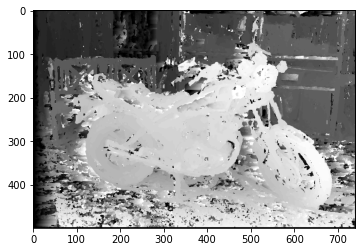

In [58]:
Ig, Id, gt = data.stereo_motorcycle()
maxdisp = 60
sto = block_matching(rgb2gray(Ig), rgb2gray(Id), 5, maxdisp)
plt.imshow(sto, cmap="gray")

In [25]:
def mode_filter ( disp , block_size ):
    # disp : carte des disparités
    # block_size : taille du bloc de filtrage
    # retourne la carte des disparités filtrée
    # initialisation de la carte des disparités filtrée
    disp_filtered = np.zeros(disp.shape, dtype=np.uint8)
    # calcul de la moitié de la taille du bloc de filtrage
    half_block_size = block_size //2
    # parcours de la carte des disparités
    for y in range ( half_block_size , disp . shape [0] - half_block_size ):
        for x in range ( half_block_size , disp . shape [1] - half_block_size ):
            # initialisation du vecteur des disparités
            disp_vector = np . zeros ( block_size **2)
            # parcours du bloc de filtrage
            for i in range ( block_size ):
                for j in range ( block_size ):
                    disp_vector [ i * block_size + j ] = disp [ y + i - half_block_size , x + j - half_block_size ]
            # calcul de la valeur de la disparité par le filtre de mode
            disp_filtered [ y , x ] = np . bincount ( disp_vector ) . argmax ()
    return disp_filtered

In [5]:
from scipy.ndimage import mode

def filter_disparity_map(disparity_map):
    filtered_map = np.zeros_like(disparity_map)
    height, width = disparity_map.shape

    for i in range(height):
        for j in range(width):
            if i < 2 or i >= height - 2 or j < 2 or j >= width - 2:
                # Ignore border pixels
                filtered_map[i, j] = disparity_map[i, j]
            else:
                # Extract the local 5x5 window
                window = disparity_map[i-2:i+3, j-2:j+3]
                # Compute the mode of the window
                window_mode = mode(window, axis=None)[0]
                # Assign the mode to the center pixel
                filtered_map[i, j] = window_mode

    return filtered_map

ImportError: cannot import name 'mode' from 'scipy.ndimage' (/home/romain/anaconda3/lib/python3.9/site-packages/scipy/ndimage/__init__.py)

In [ ]:
# test la fonction
Ig, Id, gt = data.stereo_motorcycle ()
Iggray = (rgb2gray(Ig)*255).astype('uint8')
Idgray = (rgb2gray(Id)*255).astype('uint8')
block_size = 5
max_disp = 60
disp = mode_filter(block_matching(Iggray, Idgray, block_size, max_disp), block_size)
plt. figure ()
plt. imshow ( disp , cmap = "gray" )
plt. title ( "Carte des disparités StereoBM" )
plt.show()

 97%|███████████████████████████████████████▉ | 483/496 [01:27<00:02,  5.34it/s]

In [27]:
def SAD(block1, block2):
    """Calculates the Sum of Absolute Differences (SAD) between two blocks"""
    return np.sum(np.abs(block1 - block2))

100%|████████████████████████████████████████████████████████████████████████| 496/496 [01:53<00:00,  4.37it/s]


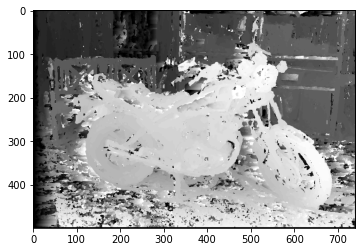